## Credit Card Fraud Detection - Task3

### Load transaction data

In [1]:
import pandas as pd
import numpy as np

# Read transaction data from log file
transaction_data = pd.read_csv("data/task3_data.csv")
transaction_data.head()

,DateTime,Amount,Class,year,month,day,hour,minute,CardKind,CardLimit,...,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction,OverAverageAmount,OverAverageCardKindAmount,OverAverageTerminalKindAmount,OverAverageMerchantAmount,OverAverageLocationAmount,WithdrawCashUseCreditCard
0,2018-06-10 12:25:00,5986,0,2018,6,10,12,25,1,4,...,1,0,0,1,1,1,1,1,1,0
1,2018-06-10 12:25:00,2422,0,2018,6,10,12,25,1,1,...,0,0,1,0,0,0,0,0,0,0
2,2018-06-10 12:25:00,9550,1,2018,6,10,12,25,1,2,...,1,0,0,1,1,1,1,1,1,0
3,2018-06-10 12:25:00,1413,0,2018,6,10,12,25,1,1,...,1,0,0,1,0,0,0,0,0,0
4,2018-06-10 12:25:00,5801,0,2018,6,10,12,25,1,2,...,0,0,0,1,1,1,1,1,1,0


In [2]:
transaction_data.shape

(11524, 26)

In [3]:
from sklearn.utils import shuffle

transaction_data = transaction_data.drop(['DateTime', 'year', 'month', 'day'], axis=1)
transaction_data = shuffle(transaction_data)
transaction_data.head()

,Amount,Class,hour,minute,CardKind,CardLimit,CardHomeLocation,CustomerNo,TerminalKind,TerminalMerchant,...,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction,OverAverageAmount,OverAverageCardKindAmount,OverAverageTerminalKindAmount,OverAverageMerchantAmount,OverAverageLocationAmount,WithdrawCashUseCreditCard
7809,3671,0,13,56,1,1,31,71163,1,1,...,1,0,0,1,1,0,1,1,1,0
5708,9574,0,13,32,1,2,68,57071,1,1,...,1,0,0,1,1,1,1,1,1,0
9199,2061,0,14,13,1,2,8,42928,0,0,...,1,0,0,1,0,0,0,0,0,0
10828,4616,0,14,32,1,1,65,24089,0,0,...,1,0,0,1,1,0,1,1,1,0
8273,1748,0,14,1,1,3,43,745,1,5,...,0,0,1,0,0,0,0,0,0,0


LR: 0.45 (0.04)


T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: 0.39 (0.03)
KNN: 0.38 (0.04)
CART: 0.54 (0.01)
RF: 0.46 (0.04)
GB: 0.49 (0.03)
AB: 0.48 (0.05)
MLP: 0.50 (0.04)
NB: 0.22 (0.01)
SVM: 0.36 (0.04)


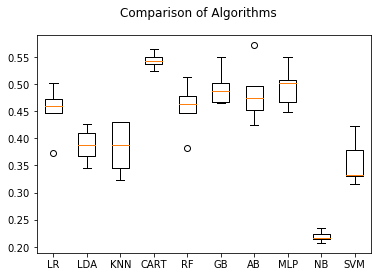

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt

X = transaction_data.drop(['Class'], axis=1)
y = transaction_data['Class']

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = [] 
for name, model in models:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X_transformed, y, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    print("%s: %.2f (%.2f)" % (name, cv_results.mean(), cv_results.std()))
    
fig = plt.figure()
fig.suptitle('Comparison of Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Train/Test(Validation) Split

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = transaction_data.drop(['Class'], axis=1)
y = transaction_data['Class']

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
#X_transformed = feature_selection_model.transform(X_transformed)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9219, 21) (9219,)
(2305, 21) (2305,)


### Build Prediction Model Using Chosen Classification Algorithm

In [6]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Test Prediction Model

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_test_predicted = model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_predicted)

print('*****Test*****')
print("Accuracy = %.2f" % accuracy)
print(classification_report(y_test, y_test_predicted))

*****Test*****
Accuracy = 0.95
             precision    recall  f1-score   support

          0       0.97      0.98      0.97      2179
          1       0.55      0.52      0.53       126

avg / total       0.95      0.95      0.95      2305



In [8]:
from sklearn.metrics import confusion_matrix

results = confusion_matrix(y_test, y_test_predicted)
tn, fp, fn, tp = results.ravel()
print('Confusion matrix:')
print(results)
print("True Positives (TP) = %d" % tp)
print("True Negatives (TN) = %d" % tn)
print("False Positives (FP) = %d (Type1 error)" % fp)
print("False Negatives (FN) = %d (Type2 error)" % fn)

Confusion matrix:
[[2126   53]
 [  61   65]]
True Positives (TP) = 65
True Negatives (TN) = 2126
False Positives (FP) = 53 (Type1 error)
False Negatives (FN) = 61 (Type2 error)


### Feature Importances

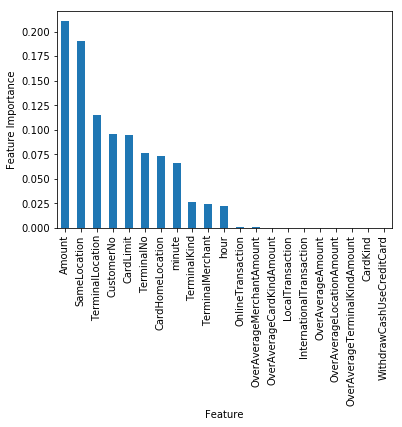

,Feature,Importance Score
0,Amount,0.211093
11,SameLocation,0.190889
9,TerminalLocation,0.115459
6,CustomerNo,0.095398
4,CardLimit,0.094390
10,TerminalNo,0.076831
5,CardHomeLocation,0.073259
2,minute,0.066501


In [9]:
from sklearn.feature_selection import SelectFromModel

X = transaction_data.drop(['Class'], axis=1)
y = transaction_data['Class']

feature_list = list(X)

feature_model = DecisionTreeClassifier()
feature_model = feature_model.fit(X, y)

feat_imp = pd.Series(feature_model.feature_importances_, feature_list).sort_values(ascending=False)
feat_imp.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()

feature_selection_data = pd.DataFrame(
    {'Feature': feature_list,
     'Importance Score': feature_model.feature_importances_ 
    })

feature_selection_model = SelectFromModel(feature_model, prefit=True)
X_transformed = feature_selection_model.transform(X)

selected_features = feature_selection_data.sort_values(by='Importance Score', ascending=False)
selected_features.head(X_transformed.shape[1])

### Balanced dataset

Number of fraudulents = 607
Number of not fraudulents = 607
Fraudulent ratio = 0.5000
Fraudulent percentege = 50.00%


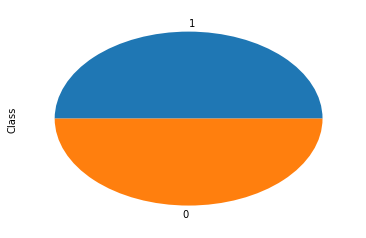

In [10]:
transaction_data_fraud = transaction_data[transaction_data.Class == 1]
number_of_fraudulents = transaction_data_fraud.shape[0]
transaction_data_normal = transaction_data[transaction_data.Class == 0].sample(n = number_of_fraudulents)
number_of_not_fraudulents = transaction_data_normal.shape[0]
 
frames = [transaction_data_fraud, transaction_data_normal]
balanced_transaction_data = pd.concat(frames)
number_of_observations = balanced_transaction_data.shape[0]
fraudulent_ratio = number_of_fraudulents / float(number_of_observations)
 
print('Number of fraudulents = {0}'.format(number_of_fraudulents))
print('Number of not fraudulents = {0}'.format(number_of_not_fraudulents))
print('Fraudulent ratio = {0:.4f}'.format(fraudulent_ratio))
print('Fraudulent percentege = {0:.2f}%'.format(fraudulent_ratio * 100))
 
number_of_is_attributed = balanced_transaction_data['Class'].value_counts()
number_of_is_attributed.plot(kind='pie')
plt.show()

LR: 0.82 (0.03)
LDA: 0.77 (0.04)
KNN: 0.69 (0.03)
CART: 0.86 (0.04)


T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


RF: 0.84 (0.04)
GB: 0.89 (0.02)
AB: 0.86 (0.03)


T:\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
T:\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
T:\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
T:\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

MLP: 0.81 (0.03)
NB: 0.69 (0.23)
SVM: 0.71 (0.05)


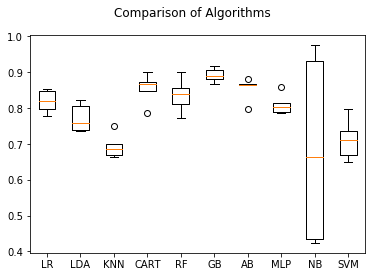

In [11]:
X = balanced_transaction_data.drop(['Class'], axis=1)
y = balanced_transaction_data['Class']

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = [] 
for name, model in models:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X_transformed, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: %.2f (%.2f)" % (name, cv_results.mean(), cv_results.std()))
    
fig = plt.figure()
fig.suptitle('Comparison of Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
X = balanced_transaction_data.drop(['Class'], axis=1)
y = balanced_transaction_data['Class']

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
#X_transformed = feature_selection_model.transform(X_transformed)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=0)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_test_predicted = model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_predicted)

print('*****Test*****')
print("Accuracy = %.2f" % accuracy)
print(classification_report(y_test, y_test_predicted))

*****Test*****
Accuracy = 0.91
             precision    recall  f1-score   support

          0       0.94      0.89      0.92       128
          1       0.89      0.94      0.91       115

avg / total       0.92      0.91      0.91       243



In [13]:
results = confusion_matrix(y_test, y_test_predicted)
tn, fp, fn, tp = results.ravel()
print('Confusion matrix:')
print(results)
print("True Positives (TP) = %d" % tp)
print("True Negatives (TN) = %d" % tn)
print("False Positives (FP) = %d (Type1 error)" % fp)
print("False Negatives (FN) = %d (Type2 error)" % fn)

Confusion matrix:
[[114  14]
 [  7 108]]
True Positives (TP) = 108
True Negatives (TN) = 114
False Positives (FP) = 14 (Type1 error)
False Negatives (FN) = 7 (Type2 error)


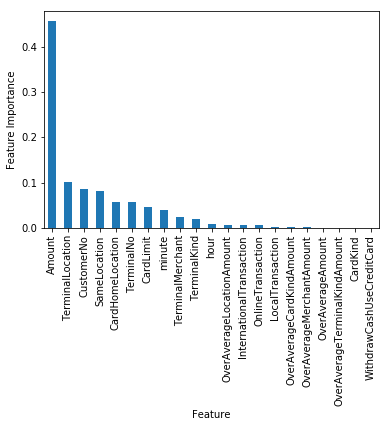

,Feature,Importance Score
0,Amount,0.456583
9,TerminalLocation,0.100580
6,CustomerNo,0.086900
11,SameLocation,0.082186
5,CardHomeLocation,0.058113
10,TerminalNo,0.056411


In [14]:
X = balanced_transaction_data.drop(['Class'], axis=1)
y = balanced_transaction_data['Class']

feature_list = list(X)

feature_model = GradientBoostingClassifier()
feature_model = feature_model.fit(X, y)

feat_imp = pd.Series(feature_model.feature_importances_, feature_list).sort_values(ascending=False)
feat_imp.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()

feature_selection_data = pd.DataFrame(
    {'Feature': feature_list,
     'Importance Score': feature_model.feature_importances_ 
    })

feature_selection_model = SelectFromModel(feature_model, prefit=True)
X_transformed = feature_selection_model.transform(X)

selected_features = feature_selection_data.sort_values(by='Importance Score', ascending=False)
selected_features.head(X_transformed.shape[1])